In [1]:
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("imputed_data.csv")

In [3]:
data.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,-0.024558,0.30051,0.10733,1.8368,34.382,-0.026711,-0.020067,2.2519,1.06670,0.67673,...,0.062497,-0.036289,0.93750,0.25454,13.6320,3.6930,69.389,5.2602,0.88260,0
1,0.639180,0.00000,1.00000,25.2490,29.678,-1.139300,0.760520,10.8270,1.11850,1.00000,...,0.679830,0.639180,0.32014,0.00000,39.1970,37.8860,0.000,48.1540,0.58639,0
2,-0.440760,0.47723,0.19260,1.4678,34.555,0.000000,-0.440760,1.0954,1.51860,0.52277,...,-0.290590,-0.843130,1.28710,0.12538,23.2650,2.5649,98.950,3.6887,3.83760,0
3,0.119520,0.17679,0.63546,4.5944,117.650,0.251540,0.148750,4.5826,1.12630,0.81017,...,0.112110,0.147520,0.88789,0.00000,8.9302,10.2870,40.355,9.0448,8.51690,0
4,0.230400,0.27095,0.23762,2.5745,-26.928,0.617540,0.282690,2.6907,0.80411,0.72905,...,0.459570,0.316020,0.62320,0.16465,7.9274,6.6605,68.502,5.3283,1.31500,0


In [4]:
np.sum(data.isna().sum())

248

In [5]:
na_columns = list(data.columns[data.isna().sum()>=1])
na_columns

['Attr17', 'Attr26', 'Attr44', 'Attr46', 'Attr54', 'Attr56']

In [6]:
for i in range(len(na_columns)) :
    column = na_columns[i] 
    data[column][data[column].isna()] = np.median(data[column][~data[column].isna()])

/Users/jominju/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
np.sum(data.isna().sum())

0

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
target = data["class"]
data.drop("class", inplace = True, axis =1)

In [10]:
data.shape

(6855, 63)

In [11]:
scaler = MinMaxScaler()
scaler.fit(data)
scaled = scaler.transform(data)

In [12]:
scaled = pd.DataFrame(scaled)
scaled.columns += 1
scaled.head()

,1,2,3,4,5,6,7,8,9,10,...,54,55,56,57,58,59,60,61,62,63
0,0.558513,0.007483,0.407631,0.000069,0.181321,0.267034,0.243518,0.000119,0.000645,0.769596,...,0.076719,0.985335,0.679698,0.045494,0.146313,0.000054,0.000034,0.001393,0.000933,0.000042
1,0.588328,0.000000,0.430965,0.000932,0.181317,0.264503,0.258801,0.000435,0.000675,0.775841,...,0.076128,0.985415,0.680652,0.044612,0.146182,0.000156,0.000351,0.001386,0.008508,0.000028
2,0.539817,0.011884,0.409860,0.000056,0.181321,0.267094,0.235282,0.000076,0.000910,0.766621,...,0.076153,0.985288,0.678558,0.045994,0.146247,0.000092,0.000024,0.001396,0.000656,0.000181
3,0.564985,0.004402,0.421436,0.000171,0.181387,0.267666,0.246823,0.000205,0.000680,0.772174,...,0.103368,0.985341,0.679958,0.045423,0.146182,0.000035,0.000095,0.001390,0.001602,0.000403
4,0.569965,0.006747,0.411037,0.000097,0.181272,0.268499,0.249446,0.000135,0.000491,0.770606,...,0.076126,0.985387,0.680195,0.045045,0.146267,0.000032,0.000062,0.001393,0.000945,0.000062


In [13]:
X = scaled
y = target

In [14]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

In [15]:
X, y = make_classification(n_samples=1000,
                           n_features=63,
                           n_informative=2,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=24,
                           shuffle=False)

In [16]:
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

In [18]:
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [19]:
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. Attr %d (%f)" % (f + 1, indices[f]+1, importances[indices[f]]))

Feature ranking:
1. Attr 2 (0.299049)
2. Attr 1 (0.033388)
3. Attr 32 (0.013577)
4. Attr 56 (0.012239)
5. Attr 60 (0.011988)
6. Attr 8 (0.011980)
7. Attr 59 (0.011797)
8. Attr 10 (0.011751)
9. Attr 13 (0.011609)
10. Attr 44 (0.011566)
11. Attr 11 (0.011506)
12. Attr 28 (0.011462)
13. Attr 12 (0.011459)
14. Attr 25 (0.011360)
15. Attr 63 (0.011319)
16. Attr 40 (0.011314)
17. Attr 15 (0.011308)
18. Attr 4 (0.011302)
19. Attr 35 (0.011279)
20. Attr 29 (0.011251)
21. Attr 61 (0.011240)
22. Attr 31 (0.011196)
23. Attr 14 (0.011195)
24. Attr 33 (0.011193)
25. Attr 62 (0.011138)
26. Attr 57 (0.011084)
27. Attr 52 (0.011076)
28. Attr 38 (0.011075)
29. Attr 58 (0.011072)
30. Attr 21 (0.011069)
31. Attr 5 (0.011052)
32. Attr 39 (0.010997)
33. Attr 42 (0.010983)
34. Attr 24 (0.010922)
35. Attr 34 (0.010914)
36. Attr 26 (0.010849)
37. Attr 9 (0.010837)
38. Attr 49 (0.010832)
39. Attr 16 (0.010818)
40. Attr 48 (0.010735)
41. Attr 51 (0.010705)
42. Attr 43 (0.010700)
43. Attr 47 (0.010661)
44. Attr 

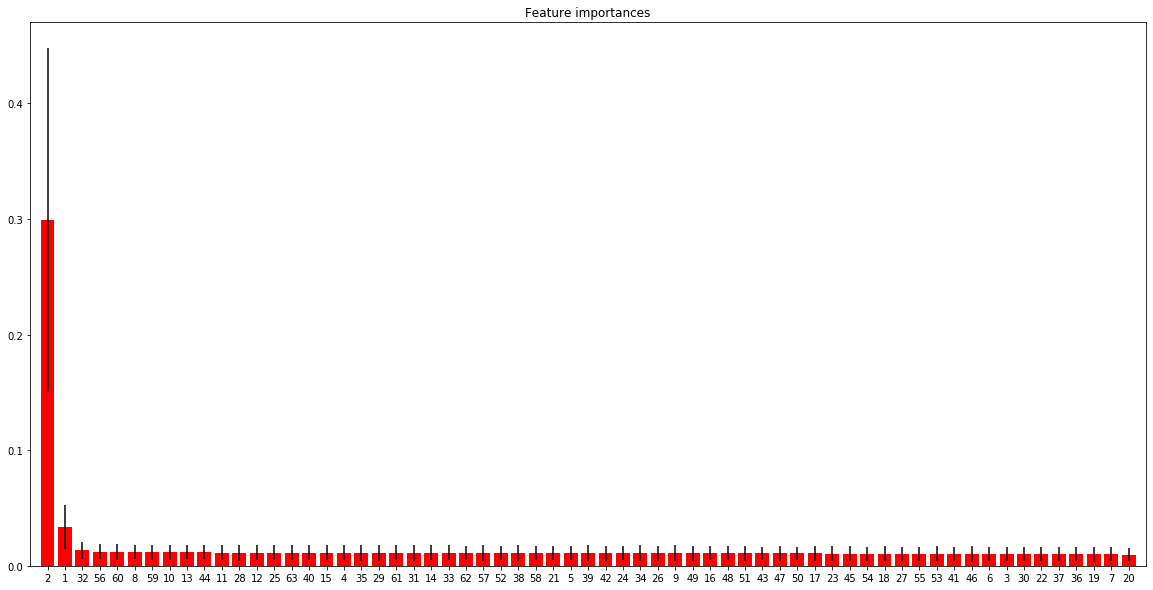

In [21]:
# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices+1)
plt.xlim([-1, X.shape[1]])
plt.show()

## Feature imortance가 높은 Attr2로 대체(Attr10에서) -> 어떻게 되는지 보자

In [39]:
idx = [1,2,5,6,9,15,17,18,19,20,21,26,27,29,41,42,45,46,47,54,55,57,59,60,61,63,64]

attr_idx=[]
for i in range(len(idx)):
    attr_idx.append("Attr{}".format(idx[i]))

In [40]:
attr_idx

['Attr1',
 'Attr2',
 'Attr5',
 'Attr6',
 'Attr9',
 'Attr15',
 'Attr17',
 'Attr18',
 'Attr19',
 'Attr20',
 'Attr21',
 'Attr26',
 'Attr27',
 'Attr29',
 'Attr41',
 'Attr42',
 'Attr45',
 'Attr46',
 'Attr47',
 'Attr54',
 'Attr55',
 'Attr57',
 'Attr59',
 'Attr60',
 'Attr61',
 'Attr63',
 'Attr64']

In [42]:
sltd_data = data[attr_idx]
sltd_data.head()

,Attr1,Attr2,Attr5,Attr6,Attr9,Attr15,Attr17,Attr18,Attr19,Attr20,...,Attr46,Attr47,Attr54,Attr55,Attr57,Attr59,Attr60,Attr61,Attr63,Attr64
0,-0.024558,0.30051,34.382,-0.026711,1.06670,6342.50,3.3276,-0.020067,-0.029744,26.775,...,1.4510,28.560,1.1106,3937.6000,-0.036289,0.25454,13.6320,3.6930,5.2602,0.88260
1,0.639180,0.00000,29.678,-1.139300,1.11850,0.00,2.1428,0.760520,0.679940,0.000,...,1.0434,0.000,1.3747,16.6650,0.639180,0.00000,39.1970,37.8860,48.1540,0.58639
2,-0.440760,0.47723,34.555,0.000000,1.51860,-476.47,2.0954,-0.440760,-0.290240,0.000,...,1.4678,0.000,1.4867,180.9100,-0.843130,0.12538,23.2650,2.5649,3.6887,3.83760
3,0.119520,0.17679,117.650,0.251540,1.12630,306.88,5.6563,0.148750,0.093023,40.872,...,3.5815,46.033,4.3151,180570.0000,0.147520,0.00000,8.9302,10.2870,9.0448,8.51690
4,0.230400,0.27095,-26.928,0.617540,0.80411,315.23,3.6907,0.282690,0.351560,46.043,...,1.9024,70.950,1.3886,2.5745,0.316020,0.16465,7.9274,6.6605,5.3283,1.31500


In [44]:
sltd_data.shape

(6855, 27)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(sltd_data, 
                                                    target,
                                                   test_size = 0.3,
                                                   random_state = 24)

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

stf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)

## RandomForest

In [49]:
forest = RandomForestClassifier(n_estimators=500, random_state=53)
score = cross_val_score(forest, X_train, Y_train, cv = stf, scoring = 'f1_micro')

In [50]:
score.mean()

0.9478949199721642

In [51]:
forest.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=53, verbose=0,
                       warm_start=False)

In [52]:
pred_y = forest.predict(X_test)

In [53]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("F1 : %.3f" % f1_score(Y_test, pred_y, average = 'micro'))

F1 : 0.951


In [63]:
roc_auc_score(Y_test, pred_y)

0.5234867860187554

## XGBoost

In [54]:
from xgboost import XGBClassifier

In [78]:
xgb_model = XGBClassifier(learning_rate = 0.05, max_depth = 200, n_estimators = 200)
xgb_score = cross_val_score(xgb_model, X_train, Y_train, cv = stf, scoring = 'f1_micro')

In [79]:
score.mean()

0.9478949199721642

In [80]:
xgb_model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=500,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [81]:
xgb_pred_y = xgb_model.predict(X_test)

In [82]:
print("F1 : %.3f" % f1_score(Y_test, xgb_pred_y, average = 'micro'))

F1 : 0.952


In [69]:
from sklearn.metrics import roc_auc_score

In [70]:
roc_auc_score(Y_test, xgb_pred_y)

0.5709718670076726

In [72]:
from sklearn.model_selection import GridSearchCV

In [85]:
n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.001, 0.005, 0.01, 0.05, 0.1]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)

xgb_greedy_model = XGBClassifier()
grid_search = GridSearchCV(xgb_greedy_model, param_grid, scoring="f1_micro", cv=stf)
grid_result = grid_search.fit(X_train, Y_train)

Best: 0.952896 using {'learning_rate': 0.1, 'n_estimators': 500}
0.947269 (0.003510) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.947269 (0.003384) with: {'learning_rate': 0.001, 'n_estimators': 200}
0.947894 (0.003630) with: {'learning_rate': 0.001, 'n_estimators': 300}
0.948519 (0.002826) with: {'learning_rate': 0.001, 'n_estimators': 400}
0.948103 (0.003023) with: {'learning_rate': 0.001, 'n_estimators': 500}
0.948311 (0.003212) with: {'learning_rate': 0.005, 'n_estimators': 100}
0.948936 (0.002351) with: {'learning_rate': 0.005, 'n_estimators': 200}
0.949562 (0.002261) with: {'learning_rate': 0.005, 'n_estimators': 300}
0.948937 (0.002340) with: {'learning_rate': 0.005, 'n_estimators': 400}
0.949145 (0.002504) with: {'learning_rate': 0.005, 'n_estimators': 500}
0.948936 (0.002351) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.948937 (0.002340) with: {'learning_rate': 0.01, 'n_estimators': 200}
0.948937 (0.002137) with: {'learning_rate': 0.01, 'n_estimators': 300}
0.

Text(0, 0.5, 'F1 Score')

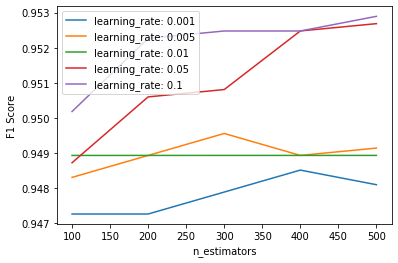

In [86]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
scores = np.array(means).reshape(len(learning_rate), len(n_estimators))
for i, value in enumerate(learning_rate):
    plt.plot(n_estimators, scores[i], label='learning_rate: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('F1 Score')

In [90]:
xgb_model = XGBClassifier(learning_rate = 0.1, max_depth = 500, n_estimators = 200)
xgb_model.fit(X_train, Y_train)
xgb_pred_y = xgb_model.predict(X_test)

In [91]:
print("F1 : %.3f" % f1_score(Y_test, xgb_pred_y, average = 'micro'))

F1 : 0.956


In [92]:
roc_auc_score(Y_test, xgb_pred_y)

0.5957374254049446